In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from fancyimpute import KNN, SoftImpute, BiScaler, MatrixFactorization, IterativeSVD, NuclearNormMinimization, IterativeImputer, SimpleFill



from sklearn.preprocessing import MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer


In [3]:
df = pd.read_csv("final.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'final.csv'

In [3]:
X = df.iloc[:,[0,6]]
X.head()

,Unnamed: 0,consumption_unit
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [4]:
X.iloc[12332456,1]

2946.0

In [5]:
X.iloc[12932756,1]

2120.008

In [6]:
X.replace(2946, np.nan, inplace=True)
X.replace(2120.008, np.nan, inplace=True)

C:\Users\UAE12\AppData\Local\Temp\ipykernel_26216\2780415678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(2946, np.nan, inplace=True)
C:\Users\UAE12\AppData\Local\Temp\ipykernel_26216\2780415678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(2120.008, np.nan, inplace=True)


In [7]:
X.iloc[12332456,1]

nan

In [8]:
X.iloc[12932756,1]

nan

In [19]:
# Normalize 
scaler = MinMaxScaler()
scaler.fit(X)
Xscaled = scaler.fit_transform(X)
#print(Xscaled)
Xinverse = scaler.inverse_transform(Xscaled)
print(Xinverse)

[[0.000000e+00 0.000000e+00]
 [1.000000e+00 0.000000e+00]
 [2.000000e+00 0.000000e+00]
 ...
 [1.584320e+06 8.567934e+03]
 [1.584321e+06 2.691308e+03]
 [1.584322e+06 8.028692e+03]]


In [51]:
# KNN SKlearn

imputerknn = KNNImputer(n_neighbors=10)
Xii = imputerknn.fit_transform(Xscaled)

# Accuracy (Closer to 1 the better)
# 1 = 0.25222250509164956
# 2 = 0.5178485175527674

# More consistant!

In [54]:
# MICE SKlearn

imputerii = IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42,n_nearest_features=5)
Xii = imputerii.fit_transform(Xscaled)

# Accuracy (Closer to 1 the better)
# 1 = 1.798363781513905
# 2 = 1.5361882992763034

In [ ]:
# Keras deep neural network


In [73]:
XXii = pd.DataFrame(scaler.inverse_transform(Xii))

youranus = XXii.iloc[12332456,1]
thor = youranus/2946
print(youranus, " , ", thor)

136242.37131409446  ,  46.246561885300224


In [74]:
marsbar = XXii.iloc[12932756,1]
galaxy = marsbar/2120.008
print(marsbar, " , ", galaxy)

47155.26299685328  ,  22.24296464770571


In [ ]:
########################################################################## SKlearn vs FancyImpute.....  Close calls 

In [32]:
# Iteratve Imputer "MICE" FancyImputer

#XX = IterativeImputer(sample_posterior=True).fit_transform(X)

# Accuracy (Closer to 1 the better)
# 1= -18.106718653755852   horrible
# 2= -40.718308693752164


In [33]:
# SoftImpute FancyImputer

XX = SoftImpute().fit_transform(X)

# Accuracy (Closer to 1 the better)
# 1= 1.8535741266413195
# 2= 0.4822853955622945

[SoftImpute] Max Singular Value of X_init = 3323153185.600430
[SoftImpute] Iter 1: observed MAE=8496.821141 rank=2
[SoftImpute] Iter 2: observed MAE=8496.821251 rank=2
[SoftImpute] Iter 3: observed MAE=8496.821323 rank=2
[SoftImpute] Iter 4: observed MAE=8496.821371 rank=2
[SoftImpute] Iter 5: observed MAE=8496.821403 rank=2
[SoftImpute] Iter 6: observed MAE=8496.821423 rank=2
[SoftImpute] Iter 7: observed MAE=8496.821437 rank=2
[SoftImpute] Iter 8: observed MAE=8496.821446 rank=2
[SoftImpute] Iter 9: observed MAE=8496.821452 rank=2
[SoftImpute] Iter 10: observed MAE=8496.821456 rank=2
[SoftImpute] Iter 11: observed MAE=8496.821459 rank=2
[SoftImpute] Iter 12: observed MAE=8496.821461 rank=2
[SoftImpute] Iter 13: observed MAE=8496.821462 rank=2
[SoftImpute] Iter 14: observed MAE=8496.821463 rank=2
[SoftImpute] Iter 15: observed MAE=8496.821463 rank=2
[SoftImpute] Iter 16: observed MAE=8496.821463 rank=2
[SoftImpute] Stopped after iteration 16 for lambda=66463063.712009


In [34]:
# IterativeSVD FancyImputer

#XX = IterativeSVD(1).fit_transform(X)

# Accuracy (Closer to 1 the better)
# 1= 1.9727378017053194
# 2= 0.5132908457025787

In [36]:
XXX = pd.DataFrame(XX)

In [37]:
uranus = XXX.iloc[12332456,1]
neptune = uranus/2946
print(uranus, " , ", neptune)

5460.629377085327  ,  1.8535741266413195


In [38]:
mars = XXX.iloc[12932756,1]
earth = mars/2120.008
print(mars, " , ", earth)

1022.4488968752287  ,  0.4822853955622945


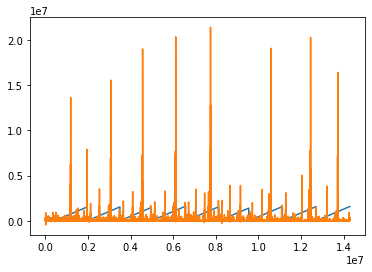

In [39]:
plt.plot(XXX)

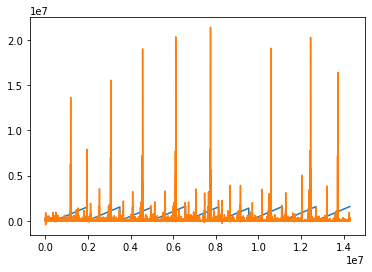

In [40]:
plt.plot(X)

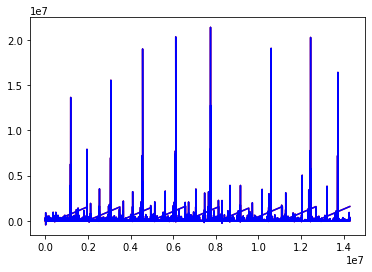

In [41]:
plt.plot(X, color='r')
plt.plot(XXX, color='b')
plt.show()